Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9048 - loss: 0.3205 - val_accuracy: 0.9857 - val_loss: 0.0494
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0486 - val_accuracy: 0.9858 - val_loss: 0.0457
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9909 - loss: 0.0313 - val_accuracy: 0.9886 - val_loss: 0.0344
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9889 - val_loss: 0.0356
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9891 - val_loss: 0.0390
313/313 - 1s - 2ms/step - accuracy: 0.9891 - loss: 0.0390

✅ Test accuracy: 0.9890999794006348


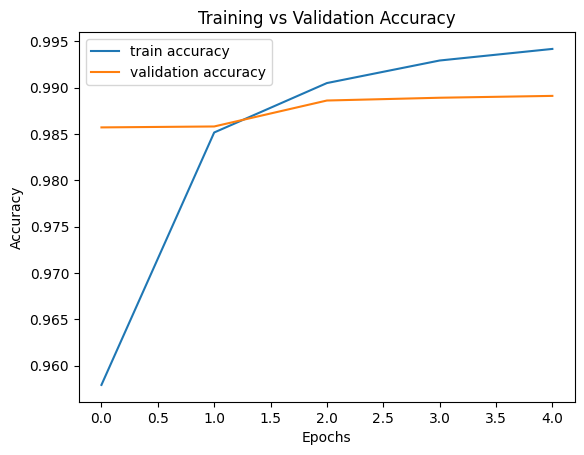

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


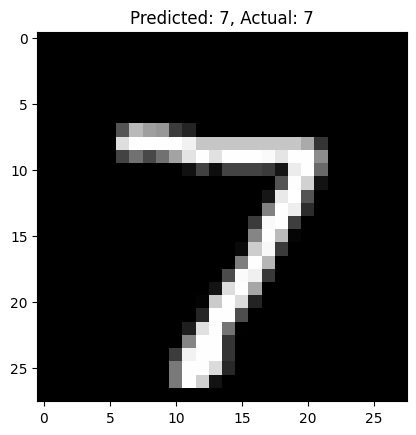

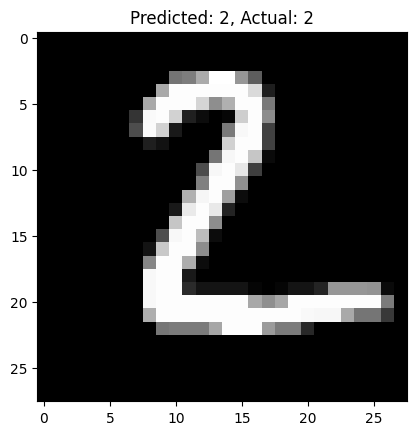

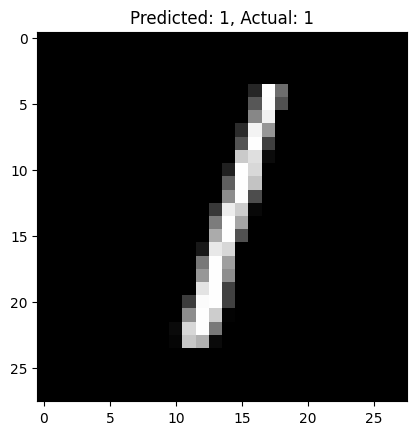

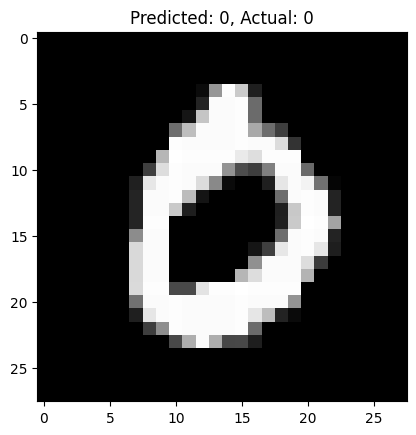

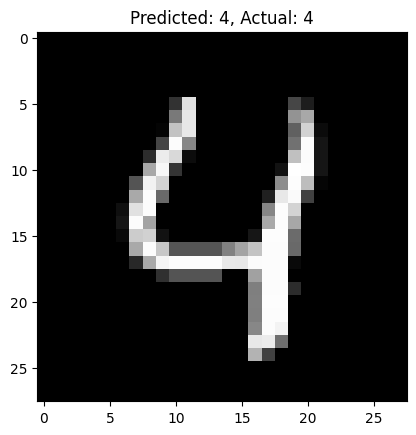

In [2]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Step 2: Normalize the data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 3: Reshape data to add a channel dimension (for CNN)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Step 4: Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Step 7: Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n✅ Test accuracy:", test_acc)

# Step 8: Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Step 9: Make predictions on test data (optional)
predictions = model.predict(x_test)

# Display a few test images with predictions
import numpy as np
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.show()